In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
file1 = open("hw1_7_train","r")
line = "start"
x = []

while 1:
    line = file1.readline()
    if not line:
        break
    line = line.replace('\t',' ')
    line = line.replace('\n','')
    line = line.split(" ")
    x.append([1]+[float(j) for j in line ])# 1 for x0
file1.close()

file1 = open("hw1_7_test","r")
line = "start"

x_test = []

while 1:
    line = file1.readline()
    if not line:
        break
    line = line.replace('\t',' ')
    line = line.replace('\n','')
    line = line.split(" ")
    x_test.append([1]+[float(j) for j in line ])# 1 for x0
file1.close()

In [7]:
def pla_nopocket(dataset, iteration):
    order = []
    for i in range(len(dataset)):
        order.append(i)
    
    random.shuffle(order)
    update = 0
    w = [0, 0, 0, 0, 0]
    err_w = len(dataset)
    while update < iteration:
        change = 0
        for i in order:
            Y = np.dot(w, dataset[i][:len(w)])
            if np.sign(Y) != dataset[i][-1]:
                for k in range(len(w)):
                    w[k] += dataset[i][-1]*dataset[i][k]
                change = 1
                update += 1
            if update == iteration:
                break
        if change == 0:
            print("Only update:", update, "times, finished")
            break
    return w

0.335607460035524


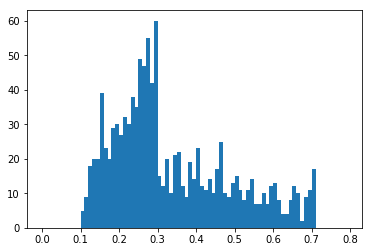

In [9]:
def err_rate(dataset, w):
    err = 0
    for i in range(len(dataset)):
        if np.sign(np.dot(w, dataset[i][:len(w)])) != dataset[i][-1]:
            err += 1
    return err/len(dataset)

record = []
for i in range(1126):
    w = pla_nopocket(x, 100)
    record.append(err_rate(x_test, w))

print(np.mean(record))
plt.hist(record, [i*0.01 for i in range(0, 80, 1)])
plt.savefig("histogram_8.png",format="png")